# Plot the segmentation masks for paper

In [1]:
import beamtime_config_2022
from beamtime_config_2022 import *

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from matplotlib import rc
from matplotlib.widgets import LassoSelector
from matplotlib.path import Path
import seaborn as sns

import xrf_roif_2022

from xrf_roif_2022 import *

import xrfm_batches
from xrfm_batches import *

import fuzzy_kmeans_engine
from fuzzy_kmeans_engine import _format_soft_km_axes, soft_clustering_weights

%matplotlib inline

from skimage.filters import sobel,scharr,prewitt

In [2]:
BASE_PATCH_WIDTH=32
selected_elm_maps=['Cu','Zn','Ca', 'K', 'P', 'S','Fe','Ni','Total_Fluorescence_Yield']
noise_type='none'
base_file_path = '/data02/AZC/March_2022_XRF_Data/'


# coarse_scan_names = ['bnp_fly0032.mda.h5']


coarse_scan_names = ['bnp_fly0032.mda.h5', 
                    'bnp_fly0042.mda.h5',
                    'bnp_fly0043.mda.h5',
                    'bnp_fly0073.mda.h5',
                    'bnp_fly0082.mda.h5',
                    'bnp_fly0102.mda.h5',
                    'bnp_fly0103.mda.h5',
                    'bnp_fly0104.mda.h5']


# 'bnp_fly0050.mda.h5',
#                     'bnp_fly0051.mda.h5']



hdf5_string_list=['MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS','MAPS']
norm_ch_list=['US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC','US_IC']
selected_elm_maps_list=[selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps,selected_elm_maps]
noise_type_list = [noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type,noise_type]
# bin_conv_elm_list=['P', 'P', 'P', 'P', 'P', 'P', 'P', 'P']
bin_conv_elm_list=['KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa', 'KPSCa']
apply_gausssian_list=[False, False, False, False,False,False,False,False]
value_offset_list = [1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12,1e-12]

BASE_PATCH_WIDTH=32



coarse_scans = XRFM_batch(base_file_path,
                  coarse_scan_names,
                 hdf5_string_list,
                 norm_ch_list,
                 selected_elm_maps_list,
                 noise_type_list,
                 bin_conv_elm_list,
                 value_offset_list,
                apply_gausssian_list,
                 BASE_PATCH_WIDTH,
                 print_pv=False,  
                 verbosity=False)

print('Bounding box width and height (pixels):' , BASE_PATCH_WIDTH)
print('Total extracted cells, features:', coarse_scans.X.shape)
print('Total extracted cell, cell size:', coarse_scans.X_bin.shape)



XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0032.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(41, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0042.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(36, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0043.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(17, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0073.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(19, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0082.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(11, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0102.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(18, 14)
XRF /data02/AZC/March_2022_XRF_Data/bnp_fly0103.mda.h5
['Cu', 'Zn', 'Ca', 'K', 'P', 'S', 'Fe', 'Ni', 'Total_Fluorescence_Yield']
(16, 14)
XRF /data02/AZC/March_2022_XRF_Dat

/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: divide by zero encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)
/data02/AZC/ROI-Finder/flx_workflows/xrf_roif_2022.py:106: RuntimeWarning: invalid value encountered in true_divide
  xrfdata[e].append(xrf[chidx]/norm)


In [3]:
sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
                         for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
plt.figure(dpi=200)
plt.imshow(sobel_mag)
# plt.imshow(img_seg_mask, cmap = 'copper', alpha = 0.3)
plt.colorbar(orientation='horizontal', shrink=0.5)
plt.title(coarse_scan_names[idx])
plt.gca().invert_yaxis() 

NameError: name 'img_seg_mask' is not defined

In [1]:
idx = 1
img=coarse_scans.X_d_K[idx]+coarse_scans.X_d_P[idx]+coarse_scans.X_d_S[idx]+coarse_scans.X_d_Ca[idx]
# img=coarse_scans.X_d_Ca[idx]

img_seg_mask = coarse_scans.X_binary_ero_dil[idx]
img_normalized = (255*((img - img.min()) / (img.max() - img.min()))).astype(np.uint8)
img_RGB = np.concatenate([img_normalized[...,np.newaxis]]*3, axis = -1)

img_sobel = prewitt(np.copy(img_seg_mask))
img_sobel = (img_sobel - img_sobel.min()) / (img_sobel.max() - img_sobel.min())
img_sobel = (255*np.round(img_sobel)).astype(np.uint8)

img_RGB[img_sobel == 255] = [0,0,255]

sobel_mag = np.sqrt(sum([sobel(img_seg_mask, axis=i)**2
                         for i in range(img_seg_mask.ndim)]) / img_seg_mask.ndim)
# sobel_mag = (255*np.round(sobel_mag)).astype(np.uint8)

# sobel_mag = sobel_mag.astype(np.uint8)
plt.figure(dpi=200)
# plt.imshow(img_RGB)
# img_RGB[sobel_mag == 255] = [0,0,255]

# plt.imshow(sobel_mag)
# plt.imshow(sobel_mag,cmap='Blues_r',alpha = 1.0)
plt.imshow(img_sobel,cmap='Blues_r',alpha = 1.0)

# plt.imshow(img_seg_mask, cmap = 'copper', alpha = 0.3)
plt.imshow(img_seg_mask, alpha = 0.1)
# plt.imshow(img_RGB)
# plt.colorbar(orientation='horizontal', shrink=0.5)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# plt.title(coarse_scan_names[idx])
plt.title('coarse scan: ' + str(idx+1))
plt.gca().invert_yaxis()   


NameError: name 'coarse_scans' is not defined

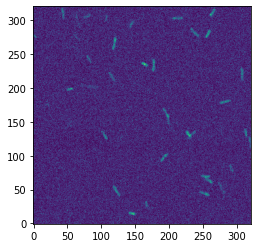

In [42]:
plt.imshow(coarse_scans.X_d_P[idx], alpha = 1.0)
plt.gca().invert_yaxis()   

In [ ]:
plt.imshow(img_seg_mask, alpha = 1.0)
plt.gca().invert_yaxis()   

In [56]:
sobel_mag

(149, 321)

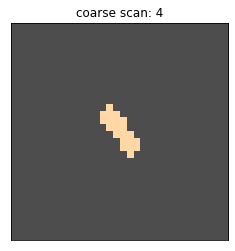

In [37]:
idx=3
plt.imshow(coarse_scans.X_bin[idx], cmap = 'copper', alpha = 0.7)
# plt.colorbar(orientation='horizontal', shrink=0.5)
plt.xticks(ticks=[])
plt.yticks(ticks=[])

# plt.title(coarse_scan_names[idx])
plt.title('coarse scan: ' + str(idx+1))
plt.gca().invert_yaxis()   
